In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import numpy as np

In [2]:
data = pd.read_csv("productos_escaneados.csv")

In [3]:
actividades=data.groupby('N_ID_ACTIVIDAD')

In [4]:
act_1=actividades.get_group(1)

In [5]:
codigos=act_1.groupby('X_CODIGO_BARRAS_PROD')

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text xticklabel objects>)

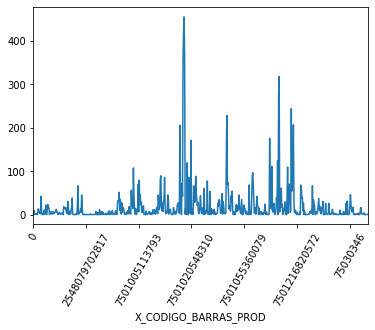

In [6]:
codigos.size().plot()
plt.xticks(rotation=60)

In [7]:
count= codigos.count()

In [8]:
diez_mas=count[count['N_ID_PARTICIPANTE']>200]

In [9]:
diez_mas

,N_ID_PE,N_ID_PARTICIPANTE,N_ID_ACTIVIDAD,X_CODIGO_TRX,D_REG
X_CODIGO_BARRAS_PROD,,,,,
7501018203849,206,206,206,206,206
7501020515343,355,355,355,355,355
7501020515350,421,421,421,421,421
7501020515398,455,455,455,455,455
7501020515879,361,361,361,361,361
7501055333820,229,229,229,229,229
75010928,279,279,279,279,279
75010935,318,318,318,318,318
7501209704193,244,244,244,244,244


In [10]:
diez_mas['N_ID_PE']

X_CODIGO_BARRAS_PROD
7501018203849    206
7501020515343    355
7501020515350    421
7501020515398    455
7501020515879    361
7501055333820    229
75010928         279
75010935         318
7501209704193    244
7501209704759    207
Name: N_ID_PE, dtype: int64

In [56]:
cinco_mas=count.nlargest(5, ['N_ID_PARTICIPANTE']) 
cinco_mas

,N_ID_PE,N_ID_PARTICIPANTE,N_ID_ACTIVIDAD,X_CODIGO_TRX,D_REG
X_CODIGO_BARRAS_PROD,,,,,
7501020515398,455,455,455,455,455
7501020515350,421,421,421,421,421
7501020515879,361,361,361,361,361
7501020515343,355,355,355,355,355
75010935,318,318,318,318,318


In [61]:
#cinco_mas.columns = cinco_mas.columns.get_level_values(0)
#df.columns = df.columns.get_level_values(0)
cinco_mas_r=cinco_mas.reset_index()
cinco_mas_r

,X_CODIGO_BARRAS_PROD,N_ID_PE,N_ID_PARTICIPANTE,N_ID_ACTIVIDAD,X_CODIGO_TRX,D_REG
0,7501020515398,455,455,455,455,455
1,7501020515350,421,421,421,421,421
2,7501020515879,361,361,361,361,361
3,7501020515343,355,355,355,355,355
4,75010935,318,318,318,318,318


(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 9 Text xticklabel objects>)

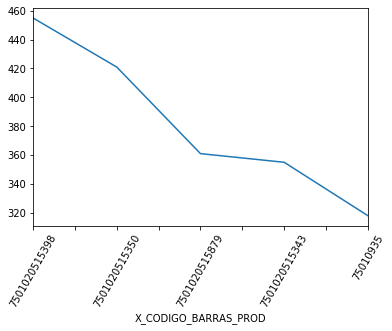

In [12]:
cinco_mas["X_CODIGO_TRX"].plot()
plt.xticks(rotation=60)

In [13]:
skus = pd.read_csv("catalogo_prod_sku_nombre.csv")

In [14]:
skus

,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
0,"Jugomex, S.A. de C.V.",Nesquik TBA 250 Slim Nueva Imagen,75000011
1,"Jugomex, S.A. de C.V.",Nesquik TBA 250 Slim Mig,75000011
2,"Jugomex, S.A. de C.V.",Nesquik Chocolate TBA 250 S Barcelona @,75000011
3,Comercializadora de Insumos,Boing Mango TBA 250 FSC @,75001759
4,Comercializadora de Insumos,BOING MANGO TBA 250ml CDMX,75001759
...,...,...,...
2835,Tetra Pak SA de CV,Photocell TBA 1000B @,1
2836,Tetra Pak SA de CV,Fotocelda TBA 1L TBA/JL FP Slim slimcap,1
2837,Tetra Pak SA de CV,TEST DESIGN TBA/JL 125 ML,1
2838,Comercializadora de Lacteos y,Lala Semi DIF Puebla TBA 250S @,1


In [63]:
#cinco_mas[["N_ID_PE","N_ID_PARTICIPANTE"]]
cinco_mas_r[["X_CODIGO_BARRAS_PROD","N_ID_PE"]]

,X_CODIGO_BARRAS_PROD,N_ID_PE
0,7501020515398,455
1,7501020515350,421
2,7501020515879,361
3,7501020515343,355
4,75010935,318


In [16]:
#cinco_mas['X_CODIGO_BARRAS_PROD']
cinco_mas.index.get_level_values(0)
cinco_mas.index.tolist()
x=pd.Series(cinco_mas.index.tolist())
x

0    7501020515398
1    7501020515350
2    7501020515879
3    7501020515343
4         75010935
dtype: object

In [17]:
#junto= skus["N_BAR_CODE"].str.find(cinco_mas.index.tolist())
#merge(x = df1, y = df2, by = NULL)
#junto= pd.merge(skus,x)
skus_mas=skus.loc[skus['N_BAR_CODE'].isin(x)]

In [18]:
skus_drop=skus_mas.drop_duplicates(subset ="N_BAR_CODE") 
skus_drop

,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935
1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879


In [65]:
df_cinco=cinco_mas_r[["X_CODIGO_BARRAS_PROD","N_ID_PE"]]
#skus_mas.drop_duplicates(subset ="N_BAR_CODE") 
df_cinco_srt=df_cinco.sort_values("X_CODIGO_BARRAS_PROD")
df_cinco["X_CODIGO_BARRAS_PROD"] = pd.to_numeric(df_cinco["X_CODIGO_BARRAS_PROD"])
df_cinco_srt=df_cinco.sort_values(by='X_CODIGO_BARRAS_PROD', ascending=True)
df_cinco_srt

C:\Users\gerar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,X_CODIGO_BARRAS_PROD,N_ID_PE
4,75010935,318
3,7501020515343,355
1,7501020515350,421
0,7501020515398,455
2,7501020515879,361


In [23]:
#df1.join(df2,lsuffix='N_BAR_CODE', rsuffix='_r')

#skus_drop.set_index('N_BAR_CODE',inplace=True)
skus_drop.sort_values("N_BAR_CODE")

,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935
1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879


In [67]:
#skus_drop.sort_values("N_BAR_CODE")
skus_drop["N_BAR_CODE"] = pd.to_numeric(skus_drop["N_BAR_CODE"])
skus_srt=skus_drop.sort_values(by='N_BAR_CODE', ascending=True)
skus_srt

C:\Users\gerar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935
1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879


In [68]:
#df = pd.concat([skus_srt,df_cinco_srt],axis=1)
df = pd.concat([df_cinco_srt.reset_index() 
  ,skus_srt.reset_index() 
  ],axis=1)
df

,index,X_CODIGO_BARRAS_PROD,N_ID_PE,index,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
0,4,75010935,318,71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935
1,3,7501020515343,355,1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
2,1,7501020515350,421,1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
3,0,7501020515398,455,1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
4,2,7501020515879,361,1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879


In [77]:
df=df.sort_values("N_ID_PE",ascending=False)
df

,index,X_CODIGO_BARRAS_PROD,N_ID_PE,index,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
3,0,7501020515398,455,1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
2,1,7501020515350,421,1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
4,2,7501020515879,361,1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879
1,3,7501020515343,355,1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
0,4,75010935,318,71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935


In [80]:
df.columns = ["index","X_CODIGO_BARRAS","#_ESCANEOS","index","X_DESIGN_NAME","X_MAT_DESC","N_BAR_CODE"]
df

,index,X_CODIGO_BARRAS,#_ESCANEOS,index,X_DESIGN_NAME,X_MAT_DESC,N_BAR_CODE
3,0,7501020515398,455,1169,Comercializadora de Lacteos y,Lala Deslac Semi TBA 1L HC23 @,7501020515398
2,1,7501020515350,421,1165,Comercializadora de Lacteos y,Lala Light TBA 1L HC23 @,7501020515350
4,2,7501020515879,361,1177,Comercializadora de Lacteos y,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,7501020515879
1,3,7501020515343,355,1160,Comercializadora de Lacteos y,Lala Entera TBA 1L HC23 @,7501020515343
0,4,75010935,318,71,"Jugomex, S.A. de C.V.",Jumex N Durazno TBA 200ml Slim GDA,75010935


In [89]:
df_act=df[["#_ESCANEOS","X_MAT_DESC","X_DESIGN_NAME","X_CODIGO_BARRAS"]]
df_act

,#_ESCANEOS,X_MAT_DESC,X_DESIGN_NAME,X_CODIGO_BARRAS
3,455,Lala Deslac Semi TBA 1L HC23 @,Comercializadora de Lacteos y,7501020515398
2,421,Lala Light TBA 1L HC23 @,Comercializadora de Lacteos y,7501020515350
4,361,NVA IMAGEN Lala Deslac Baja TBA 1L HC23,Comercializadora de Lacteos y,7501020515879
1,355,Lala Entera TBA 1L HC23 @,Comercializadora de Lacteos y,7501020515343
0,318,Jumex N Durazno TBA 200ml Slim GDA,"Jugomex, S.A. de C.V.",75010935


In [ ]:
df_act['ACTIVIDAD']

In [95]:
cat_actividades = pd.read_csv("actividades_buena.csv")
cat_actividades.head(2)

,N_ID_ACTIVIDAD,N_ID_TIPO,N_ID_PERFIL,N_PUNTOS,X_TITULO,X_DESC,X_URL_IMAGEN,N_LIMIT_PARTICIPACION,N_MIN_SUSPENCION,N_NUM_ESCANEOS,N_LIMIT_PROD_IGUAL,N_MIN_SUSPENCION_SCAN_PROD,N_ID_TRIVIA,X_ESTATUS,D_INICIO,D_FIN,D_REG,D_MOD,F_TIMER,X_UNIDAD_TIMER
0,1,1,0,2,ESKANEANDO,"Compra cualquier producto en envase Tetra Pak,...",https://tetrapakapp.com.mx/media/activities/0f...,5,120,5,2,1440,3,E,2018-06-01 00:00:00,2018-12-30 14:11:00,2018-06-01 14:11:00,2019-08-14 11:23:24,5,s
1,2,2,0,2,Genio Tetra Pak,Compra cualquier producto en envase Tetra Pak ...,https://tetrapakapp.com.mx/media/activities/79...,5,120,5,2,1440,0,E,2018-07-13 00:00:00,2018-12-20 00:00:23,2018-07-13 17:58:12,2019-08-14 11:23:24,15,s


In [101]:
cat_a_e=cat_actividades[['N_ID_ACTIVIDAD','X_TITULO','D_INICIO','D_FIN']]

In [102]:
cat_a_e[cat_actividades['N_ID_ACTIVIDAD']==1]

,N_ID_ACTIVIDAD,X_TITULO,D_INICIO,D_FIN
0,1,ESKANEANDO,2018-06-01 00:00:00,2018-12-30 14:11:00
